In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import Waveform_Analysis.PMT_POSITIONS as pmtpos
import Waveform_Analysis.data_processing.settings as settings
import Waveform_Analysis.CABLE_DELAYS as cableDelays
import math

fileToView = "/home/mpearson5/EOS/runs/run199.root"
fileObject = ROOT.TFile.Open(fileToView)
eventTree = fileObject.Get("events")
metaTree = fileObject.Get("meta")

#print(eventTree.Print())
events = int(eventTree.GetEntries())
#fileObject.Close()

eventPositionX = 0.0
eventPositionY = -1371.0
eventPositionZ = 2184.4

print("Finished loading")

Welcome to JupyROOT 6.28/13
Finished loading


In [ ]:
event = 1



# Plot fitted_time

In [3]:
fittedTimeCanvas = ROOT.TCanvas("","",800,800)
fittedTimeHist = ROOT.TH1D("hist","Fitted time for" + fileToView, 1000, -15,150)

for event in range(events):
    #print("Event " + str(event))
    eventTree.GetEntry(event)

    # Gets the PMT Corresponding to an event
    pmts = list(eventTree.lcn)
    fittedTimes = list(eventTree.fitted_time)

    for time,pmt in zip(fittedTimes, pmts):

        #print(pmt)
        distance = math.sqrt(((pmtpos.x[pmt]-eventPositionX)**2)+((pmtpos.y[pmt]-eventPositionY)**2)+((pmtpos.z[pmt]-eventPositionZ)**2))
        if pmtpos.x[pmt] == -1:
            continue

        timeResidual = time - distance/settings.v_water
        fittedTimeHist.Fill(timeResidual)

fittedTimeHist.Draw()
fittedTimeCanvas.Draw()

IndexError: list index out of range

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


# Plot Time Residual for a single PMT

0.0


Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <Fit>: Fit data is empty 


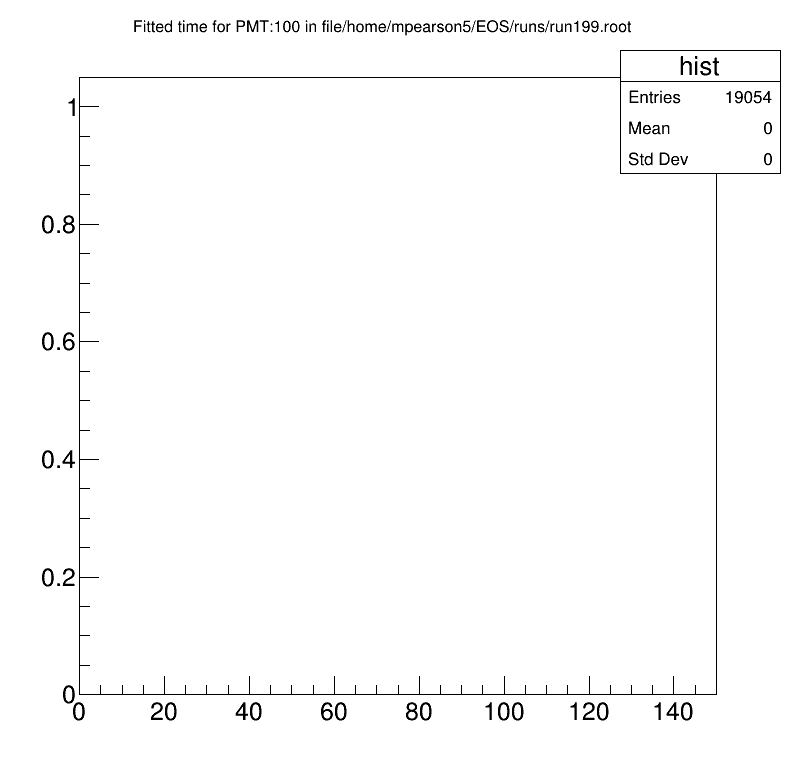

In [8]:
PMT = 100
PMTfittedTimeCanvas = ROOT.TCanvas("","",800,800)
PMTfittedTimeHist = ROOT.TH1D("hist","Fitted time for PMT:" + str(PMT) +" in file" + fileToView, 1000, 0,150)

for event in range(events):
    #print("Event " + str(event))
    eventTree.GetEntry(event)

    # Gets the PMT Corresponding to an event
    pmts = list(eventTree.lcn)
    fittedTimes = list(eventTree.fitted_time)

    if PMT not in pmts:
        continue

    for time,pmt in zip(fittedTimes, pmts):

        if PMT != pmt:
            continue
        if pmtpos.x[pmt] == -1:
            continue

        distance = math.sqrt(((pmtpos.x[pmt]-eventPositionX)**2)+((pmtpos.y[pmt]-eventPositionY)**2)+((pmtpos.z[pmt]-eventPositionZ)**2))
        timeResidual = time - distance/settings.v_water
        PMTfittedTimeHist.Fill(timeResidual)

PMTmaxBin = PMTfittedTimeHist.GetMaximumBin()
maxValue = PMTfittedTimeHist.GetXaxis().GetBinCenter(PMTmaxBin)

PMTfit = ROOT.TF1("PMTFit", "gaus", maxValue-10,maxValue+10)
PMTfittedTimeHist.Fit("PMTFit","R")
print(PMTfit.GetParameter(1))

PMTfittedTimeHist.Draw()
PMTfittedTimeCanvas.Draw()

# Calculate the Cable Delays

In [11]:
cable_Delays = [None]*len(pmtpos.x)
canvas = ROOT.TCanvas("","",800,800)

for lnc in range(len(pmtpos.x)):

    pmtHist = ROOT.TH1D("hist","", 1000,-150,150)
    
    if lnc%10==0:
        print("Calculated "+ str(lnc) + "/268")
    for event in range(events):
        eventTree.GetEntry(event)
        # Gets the PMT Corresponding to an event
        pmts = list(eventTree.lcn)
        fittedTimes = list(eventTree.fitted_time)

        #print(pmts)
        #print(fittedTimes)

        if lnc not in pmts:
            continue

        for time,pmt in zip(fittedTimes, pmts):

            if lnc != pmt:
                continue
            
            if pmtpos.x[pmt] == -1:
                continue

            distance = math.sqrt(((pmtpos.x[pmt]-eventPositionX)**2)+((pmtpos.y[pmt]-eventPositionY)**2)+((pmtpos.z[pmt]-eventPositionZ)**2))
    
            timeResidual = time - distance/settings.v_water
            pmtHist.Fill(timeResidual)

    maxBin = pmtHist.GetMaximumBin()
    maxValue = pmtHist.GetXaxis().GetBinCenter(maxBin)

    #gausFit = ROOT.TF1("gausFit", "gaus", maxValue-10,maxValue+10) Tried using a gaus fit but some had issues
    #pmtHist.Fit("gausFit")
    #cable_Delays[lnc] = gausFit.GetParameter(1)
    #del(gausFit)
    cable_Delays[lnc] = maxValue
    # if lnc == 5:
    #     print(maxValue)
    #     #print(gausFit.GetParameter(1))
    #     pmtHist.Draw()
    #     canvas.Draw()
    #     break
    del(pmtHist)
    #pmtHist.Reset("ICESM")

print(cable_Delays)

Calculated 0/268
Calculated 10/268
Calculated 20/268
Calculated 30/268
Calculated 40/268
Calculated 50/268
Calculated 60/268
Calculated 70/268
Calculated 80/268
Calculated 90/268
Calculated 100/268
Calculated 110/268
Calculated 120/268
Calculated 130/268
Calculated 140/268
Calculated 150/268
Calculated 160/268
Calculated 170/268
Calculated 180/268
Calculated 190/268
Calculated 200/268
Calculated 210/268
Calculated 220/268
Calculated 230/268
Calculated 240/268
Calculated 250/268
Calculated 260/268
[-149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -149.85, -1

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


# Plot fitted time with calculated cable delays

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).


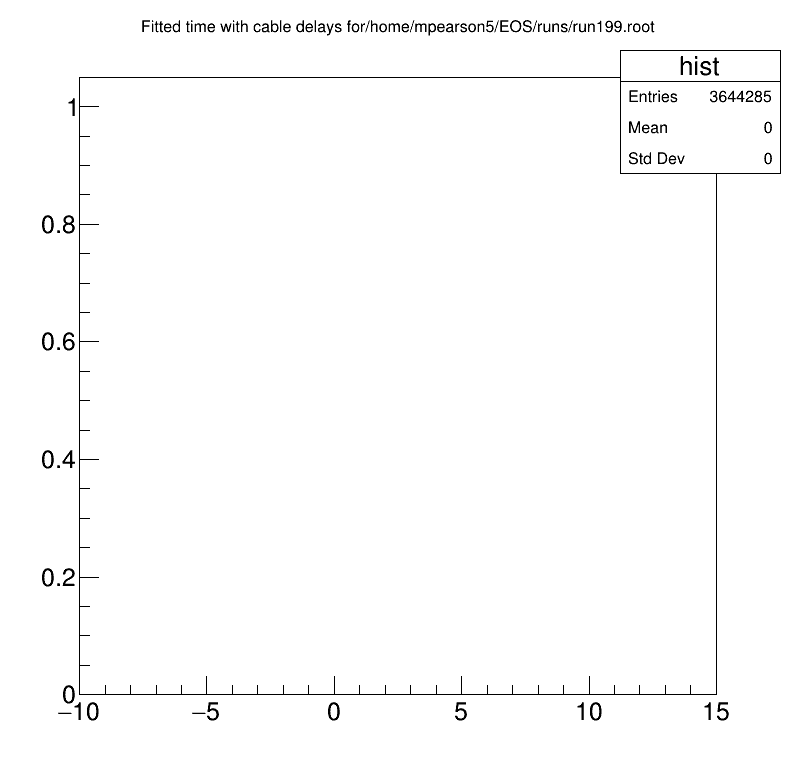

In [17]:
fittedTimeCanvas = ROOT.TCanvas("","",800,800)
fittedTimeHist = ROOT.TH1D("hist","Fitted time with cable delays for" + fileToView, 1000, -10,15)

for event in range(events):
    #print("Event " + str(event))
    eventTree.GetEntry(event)

    # Gets the PMT Corresponding to an event
    pmts = list(eventTree.lcn)
    fittedTimes = list(eventTree.fitted_time)

    for time,pmt in zip(fittedTimes, pmts):

        if pmt == 268:
            continue

        distance = math.sqrt(((pmtpos.x[pmt]-eventPositionX)**2)+((pmtpos.y[pmt]-eventPositionY)**2)+((pmtpos.z[pmt]-eventPositionZ)**2))
        if pmtpos.x[pmt] == -1:
            continue

        timeResidual = time - distance/settings.v_water
        timeResidual -= cable_Delays[pmt]
        fittedTimeHist.Fill(timeResidual)

fittedTimeHist.Draw()
fittedTimeCanvas.Draw()